# Crawling data Berita

In [ ]:
!pip install Sastrawi
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import warnings
import pandas as pd
import numpy as np
import nltk
import re
import csv

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.6 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk
import pandas as pd

# Unduh konten halaman web berita
url = "https://radarjatim.id/festival-film-pendek-layar-lokal-diserbu-ratusan-pelajar-sma-dan-smk/"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div', class_="content-inner")  # Sesuaikan dengan struktur HTML halaman web berita

# Periksa apakah elemen article ada sebelum mencoba mengambil teksnya
if article is not None:
    article_text = article.get_text()

    # Tokenisasi teks menjadi kalimat menggunakan nltk
    nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
    sentences = nltk.sent_tokenize(article_text)

    # Cetak kalimat-kalimat
    for sentence in sentences:
        print(sentence)
else:
    print("Elemen berita tidak ditemukan")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



SIDOARJO (RadarJatim.id) — Komunitas-komunitas film pendek yang ada di Sidoarjo terus bergerak, mensosialisasikan keberadaan film pendek yang berkembang membaik.
Kali ini bertemakan ‘Keanekaragaman Lokalitas dan Budaya’ pada tanggal 28-29 Oktober 2023 di Gedung Dewan Kesenian Sidoarjo.
Festival yang memutar film ‘Layar Lokal’ mengangkat kearifan lokal dari berbagai wilayah di Indonesia tersebut, tak diduga diserbu oleh para remaja, rata-rata pelajar SMA, SMK Sidoarjo, Surabaya dan sekitarnya.
Sehingga panitia pun harus menambahkan kursi untuk penonton.
Ketua Asfis (Asosiasi Sineas Film Sidoarjo) Rehal Lahir Prias Sumputari mengatakan kalau kegiatannya mempunyai tiga program utama, yaitu pelatihan, workshop dan pemutaran film.
Juga membantu teman-teman komunitas film yang ada di Sidoarjo, khususnya untuk mendistribusikan karya-karyanya ke berbagai festival.
“Karena kebanyakan teman-teman saat ini kendalanya adalah bagaimana film ini setelah syuting.
Itu mau dikemanakan, teman-teman mas

In [ ]:
# Inisialisasi DataFrame
df = pd.DataFrame(columns=["Kalimat"])
df["Kalimat"] = sentences
df

,Kalimat
0,\nSIDOARJO (RadarJatim.id) — Komunitas-komunit...
1,Kali ini bertemakan ‘Keanekaragaman Lokalitas ...
2,Festival yang memutar film ‘Layar Lokal’ menga...
3,Sehingga panitia pun harus menambahkan kursi u...
4,Ketua Asfis (Asosiasi Sineas Film Sidoarjo) Re...
5,Juga membantu teman-teman komunitas film yang ...
6,“Karena kebanyakan teman-teman saat ini kendal...
7,"Itu mau dikemanakan, teman-teman masih bingung..."
8,Itu menjadi tugas kami untuk bersama-sama kita...
9,"Jadi tidak hanya membuat film, tidak hanya fil..."


In [ ]:
# Lowercasing
article_text = article_text.lower()

# Cleaning
article_text = ''.join(e for e in article_text if (e.isalnum() or e.isspace() or e == '.'))

# Hapus Angka
article_text = ''.join([char for char in article_text if not char.isdigit()])

# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')
sentences = nltk.sent_tokenize(article_text)

# Tokenisasi setiap kalimat menjadi kata-kata
words = [nltk.word_tokenize(sentence) for sentence in sentences]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#custome stopword
from nltk.corpus import stopwords

# Mengambil daftar stopword bahasa Indonesia dari NLTK
stopwords_indonesia = set(stopwords.words("indonesian"))

# Sekarang, Anda memiliki daftar stopword yang telah diperbarui
print(stopwords_indonesia)

{'bila', 'sebanyak', 'siap', 'mengakhiri', 'menginginkan', 'menjelaskan', 'diantaranya', 'sebaik', 'kalaupun', 'menyiapkan', 'sebagai', 'diketahuinya', 'sendiri', 'kini', 'lalu', 'berlangsung', 'kamu', 'dikatakan', 'kesampaian', 'sekecil', 'jika', 'belakangan', 'digunakan', 'masing', 'mengenai', 'sedangkan', 'tertuju', 'sekitar', 'lamanya', 'tampaknya', 'akulah', 'berakhirlah', 'masing-masing', 'menjadi', 'ditunjukkan', 'malah', 'kami', 'lain', 'diinginkan', 'kepada', 'menanti', 'terjadi', 'sama-sama', 'tanya', 'jangan', 'memulai', 'sampai', 'amatlah', 'dipastikan', 'padahal', 'sekali', 'agar', 'terhadapnya', 'yaitu', 'dikatakannya', 'kapan', 'yakni', 'bagian', 'terkira', 'rasanya', 'awal', 'belumlah', 'menunjuknya', 'berturut-turut', 'diantara', 'cukuplah', 'empat', 'inginkah', 'waktunya', 'mendatangkan', 'beginian', 'daripada', 'ungkap', 'lanjutnya', 'bukannya', 'terdiri', 'kalian', 'sementara', 'karena', 'sebelumnya', 'kebetulan', 'menegaskan', 'kurang', 'ditanyai', 'berikut', 'beri

In [ ]:
# Stopword Removal
stop_words = set(stopwords.words('indonesian'))
filtered_sentences = []


for sentence in words:
    filtered_sentence = [word for word in sentence if word.lower() not in stop_words]
    filtered_sentences.append(filtered_sentence)


# Cetak kalimat-kalimat yang telah diproses
for filtered_sentence in filtered_sentences:
    print(filtered_sentence)

# Tutup respons setelah digunakan
response.close()

['sidoarjo', 'radarjatim.id', 'komunitaskomunitas', 'film', 'pendek', 'sidoarjo', 'bergerak', 'mensosialisasikan', 'keberadaan', 'film', 'pendek', 'berkembang', 'membaik', '.']
['kali', 'bertemakan', 'keanekaragaman', 'lokalitas', 'budaya', 'tanggal', 'oktober', 'gedung', 'dewan', 'kesenian', 'sidoarjo', '.']
['festival', 'memutar', 'film', 'layar', 'lokal', 'mengangkat', 'kearifan', 'lokal', 'wilayah', 'indonesia', 'diduga', 'diserbu', 'remaja', 'ratarata', 'pelajar', 'sma', 'smk', 'sidoarjo', 'surabaya', '.']
['panitia', 'kursi', 'penonton', '.']
['ketua', 'asfis', 'asosiasi', 'sineas', 'film', 'sidoarjo', 'rehal', 'lahir', 'prias', 'sumputari', 'kegiatannya', 'program', 'utama', 'pelatihan', 'workshop', 'pemutaran', 'film', '.']
['membantu', 'temanteman', 'komunitas', 'film', 'sidoarjo', 'mendistribusikan', 'karyakaryanya', 'festival', '.']
['kebanyakan', 'temanteman', 'kendalanya', 'film', 'syuting', '.']
['dikemanakan', 'temanteman', 'bingung', 'disiapkan', '.']
['tugas', 'bersama

In [ ]:
pip install tabulate

In [ ]:
from tabulate import tabulate
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming filtered_sentences is a list of sentences after stopword removal

# Join the filtered sentences into a list of strings
corpus = [' '.join(sentence) for sentence in filtered_sentences]

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the corpus to get the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a Pandas DataFrame for better visualization
df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

# Add a column for the sentences
df.insert(0, 'Kalimat', [' '.join(sentence) for sentence in filtered_sentences])

# Add a column for the sentence numbers
df.insert(0, 'No', range(1, len(filtered_sentences) + 1))

# Add a column for the count of terms in each sentence
df['Term Count'] = df.drop(['Kalimat', 'No'], axis=1).gt(0).sum(axis=1)

# Set the display options for Pandas to show all columns without truncation
pd.set_option("display.max_columns", None)

# Print the DataFrame in a tabular format with borders
table = tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False)
print(table)


╒══════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════╤═════════════════╤═════════╤═══════════════════════════════════════════════╤════════════╤══════════╤═══════════╤═════════════╤════════════╤════════════════╤════════════╤═══════════════╤══════════════╤═══════════════╤════════════╤══════════════╤═══════════╤═══════════╤══════════╤══════════╤════════════════╤══════════╤══════════╤═══════════════╤═══════════╤═════════════╤════════════╤══════════╤═══════════╤══════════════╤════════════╤══════════╤════════════╤═══════════════╤═════════════╤════════════════╤═════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════════╤═════════════╤═════════════╤════════════╤══════════╤══════════╤══════════╤══════════╤═════════════════╤══════════════════╤════════════╤══════════════╤══════════════╤═══════════════╤══════════════╤════════════╤═════════╤═════════════╤═══════════════

In [ ]:
len(feature_names)

130

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")

Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0655


In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")

Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0655
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.0796
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.1082
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.1341
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0561
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.0506
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.1075
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.0361
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.0298
Cosine Similarity antara Kalimat 1 dan Kalimat 13: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 14: 0.0455
Cosine Similarity antara Kalimat 1 dan Kalimat 15: 0.0369
Cosine Similarity antara Kalimat 1 dan Kalimat 16: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 17: 0.1443
Cosine Similarity antara Kalimat 1 dan Kalimat 18: 0.0000
Cosine Similarity anta

In [ ]:
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df

,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13,Kalimat 14,Kalimat 15,Kalimat 16,Kalimat 17,Kalimat 18,Kalimat 19,Kalimat 20
Kalimat 1,1.000000,0.065459,0.079632,0.0,0.108175,0.134066,0.056099,0.000000,0.050648,0.107483,0.036051,0.029845,0.000000,0.045513,0.036936,0.000000,0.144280,0.000000,0.000000,0.056650
Kalimat 2,0.065459,1.000000,0.031347,0.0,0.031969,0.052775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.168712,0.000000,0.000000,0.000000
Kalimat 3,0.079632,0.031347,1.000000,0.0,0.051803,0.107087,0.026865,0.000000,0.024255,0.051472,0.168226,0.128458,0.000000,0.021796,0.206892,0.093714,0.298494,0.000000,0.129277,0.000000
Kalimat 4,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kalimat 5,0.108175,0.031969,0.051803,0.0,1.000000,0.087214,0.054795,0.000000,0.049471,0.161464,0.035213,0.029151,0.000000,0.044455,0.036078,0.000000,0.093858,0.000000,0.000000,0.045053
Kalimat 6,0.134066,0.052775,0.107087,0.0,0.087214,1.000000,0.150079,0.104357,0.040834,0.086657,0.087541,0.120879,0.000000,0.036694,0.029779,0.113192,0.194024,0.086733,0.000000,0.000000
Kalimat 7,0.056099,0.000000,0.026865,0.0,0.054795,0.150079,1.000000,0.131518,0.051462,0.109211,0.036630,0.150539,0.000000,0.046245,0.037530,0.076373,0.048674,0.109307,0.000000,0.000000
Kalimat 8,0.000000,0.000000,0.000000,0.0,0.000000,0.104357,0.131518,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076014,0.000000,0.108792,0.000000,0.000000
Kalimat 9,0.050648,0.000000,0.024255,0.0,0.049471,0.040834,0.051462,0.000000,1.000000,0.098601,0.033072,0.027378,0.000000,0.041752,0.033884,0.000000,0.043945,0.000000,0.000000,0.000000
Kalimat 10,0.107483,0.000000,0.051472,0.0,0.161464,0.086657,0.109211,0.000000,0.098601,1.000000,0.070183,0.058101,0.000000,0.088604,0.071906,0.000000,0.093258,0.000000,0.000000,0.059864


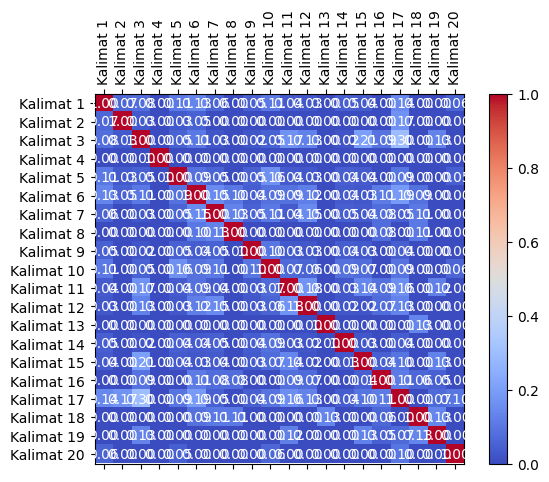

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()

In [ ]:
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")

Closeness Centrality of 
sidoarjo radarjatim.id  komunitaskomunitas film pendek yang ada di sidoarjo terus bergerak mensosialisasikan keberadaan film pendek yang berkembang membaik.: 11.1557
Closeness Centrality of kali ini bertemakan keanekaragaman lokalitas dan budaya pada tanggal  oktober  di gedung dewan kesenian sidoarjo.: 10.4167
Closeness Centrality of festival yang memutar film layar lokal mengangkat kearifan lokal dari berbagai wilayah di indonesia tersebut tak diduga diserbu oleh para remaja ratarata pelajar sma smk sidoarjo surabaya dan sekitarnya.: 11.9402
Closeness Centrality of sehingga panitia pun harus menambahkan kursi untuk penonton.: 0.0000
Closeness Centrality of ketua asfis asosiasi sineas film sidoarjo rehal lahir prias sumputari mengatakan kalau kegiatannya mempunyai tiga program utama yaitu pelatihan workshop dan pemutaran film.: 11.7186
Closeness Centrality of juga membantu temanteman komunitas film yang ada di sidoarjo khususnya untuk mendistribusikan karyakar

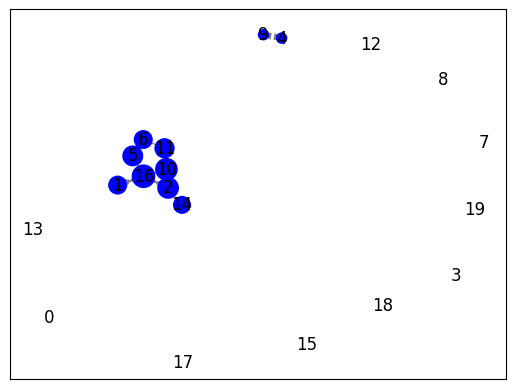

In [ ]:
import networkx as nx

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0.15 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

In [ ]:
# Cetak closeness centrality
print("Closeness Centrality:")
# for node, closeness in closeness_centrality.items():
#     print(f"Node {node}: {closeness:.4f}")
sorted_closeness = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))
for node, closeness in sorted_closeness.items():
    print(f"Node {node}: {closeness:.4f}")

Closeness Centrality:
Node 16: 0.2579
Node 10: 0.2344
Node 2: 0.2149
Node 5: 0.1984
Node 11: 0.1842
Node 1: 0.1612
Node 6: 0.1612
Node 14: 0.1433
Node 4: 0.0526
Node 9: 0.0526
Node 0: 0.0000
Node 3: 0.0000
Node 7: 0.0000
Node 8: 0.0000
Node 12: 0.0000
Node 13: 0.0000
Node 15: 0.0000
Node 17: 0.0000
Node 18: 0.0000
Node 19: 0.0000


In [ ]:
# Cetak closeness centrality
top_3_closeness = list(sorted_closeness.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
datacl = {
    "Node": [node for node, _ in top_3_closeness],
    "Closeness Centrality": [closeness for _, closeness in top_3_closeness],
    "Kalimat": [sentences[node] for node, _ in top_3_closeness]
}

df_top_3 = pd.DataFrame(datacl)

# Cetak DataFrame
print("Tiga Node Closeness Teratas")
df_top_3

Tiga Node Closeness Teratas


,Node,Closeness Centrality,Kalimat
0,16,0.257895,kita bisa belajar tentang kearifan lokal maupu...
1,10,0.234450,kemudian sekedar informasi juga layar lokal in...
2,2,0.214912,festival yang memutar film layar lokal mengang...


In [ ]:
# Hitung PageRank
pagerank = nx.pagerank(G)

# Cetak PageRank dalam urutan dari terbesar ke terkecil
print("PageRank :")
sorted_pagerank = dict(sorted(pagerank.items(), key=lambda item: item[1], reverse=True))
for node, rank in sorted_pagerank.items():
    print(f"Node {node}: {rank:.4f}")

PageRank :
Node 16: 0.1473
Node 2: 0.1139
Node 10: 0.1097
Node 4: 0.0870
Node 9: 0.0870
Node 6: 0.0793
Node 5: 0.0780
Node 11: 0.0778
Node 14: 0.0453
Node 1: 0.0443
Node 0: 0.0130
Node 3: 0.0130
Node 7: 0.0130
Node 8: 0.0130
Node 12: 0.0130
Node 13: 0.0130
Node 15: 0.0130
Node 17: 0.0130
Node 18: 0.0130
Node 19: 0.0130


In [ ]:
# Cetak closeness centrality
top_3_pagerank = list(sorted_pagerank.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
datapg = {
    "Node": [node for node, _ in top_3_pagerank],
    "Pagerank": [rank for _, rank in top_3_pagerank],
    "Kalimat": [sentences[node] for node, _ in top_3_pagerank]
}

df_top_3pg = pd.DataFrame(datapg)

# Cetak DataFrame
print("Tiga Node Pagerank Teratas")
df_top_3pg

Tiga Node Pagerank Teratas


,Node,Pagerank,Kalimat
0,16,0.147251,kita bisa belajar tentang kearifan lokal maupu...
1,2,0.113938,festival yang memutar film layar lokal mengang...
2,10,0.109688,kemudian sekedar informasi juga layar lokal in...


In [ ]:
import pandas as pd

# Hitung betweenness centrality
betweenness= nx.betweenness_centrality(G)

# Cetak DataFrame
print("DataFrame Betweenness Centrality:")
sorted_betweenness = dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True))
for node, between in sorted_betweenness.items():
    print(f"Node {node}: {between:.4f}")

DataFrame Betweenness Centrality:
Node 16: 0.0585
Node 2: 0.0351
Node 10: 0.0292
Node 5: 0.0175
Node 11: 0.0117
Node 6: 0.0058
Node 0: 0.0000
Node 1: 0.0000
Node 3: 0.0000
Node 4: 0.0000
Node 7: 0.0000
Node 8: 0.0000
Node 9: 0.0000
Node 12: 0.0000
Node 13: 0.0000
Node 14: 0.0000
Node 15: 0.0000
Node 17: 0.0000
Node 18: 0.0000
Node 19: 0.0000


In [ ]:
# Cetak closeness centrality
top_3_between = list(sorted_betweenness.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
databw = {
    "Node": [node for node, _ in top_3_between],
    "Between": [between for _, between in top_3_between],
    "Kalimat": [sentences[node] for node, _ in top_3_between]
}

df_top_3bw = pd.DataFrame(databw)

# Cetak DataFrame
print("Tiga Node Between Teratas")
df_top_3bw

Tiga Node Between Teratas


,Node,Between,Kalimat
0,16,0.058480,kita bisa belajar tentang kearifan lokal maupu...
1,2,0.035088,festival yang memutar film layar lokal mengang...
2,10,0.029240,kemudian sekedar informasi juga layar lokal in...
